# 2차원 데이터 시각화

2차원 데이터를 시각화하는 다양한 방식을 소개하고, 이를 선형 회귀 문제를 푸는데 적용시켜 본다.
이전 장에서 다룬 산점도를 포함하여 2차원 히스토그램에 해당하는 히트맵, `Subplot`을 통해 여러 장의 그림을 동시에 시각화하는 방법을 다룬다.

**기본 설정**

`numpy`와 `pandas` 라이브러리를 각각 `np`와 `pd`로 불러온다.

In [17]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [18]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [19]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [20]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`라는 별칭으로 불러온다.

In [21]:
import matplotlib.pyplot as plt

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/statsRev/tree/master/data)를 지정한다.

In [22]:
data_url = 'https://raw.githubusercontent.com/codingalzi/statsRev/refs/heads/master/data/'

## 서브플롯 관리

**예제 1**

2015년부터 OECD 회원국가의 36개 국가의 2015년도와 2024년도의 삶의 만족도 조사 데이터

In [27]:
life_satisfaction = pd.read_csv(data_url + "life_satisfaction_2015_2024.csv", index_col='Country')
life_satisfaction

,2015,2024
Country,,
Australia,7.3,7.1
Austria,6.9,7.2
Belgium,6.9,6.8
Brazil,7.0,6.1
Canada,7.3,7.0
Chile,6.7,6.2
Czech Republic,6.5,6.9
Denmark,7.5,7.5
Estonia,5.6,6.5


**예제 2**

182 개 국가의 2015년과 2020년의 1인당 국민총생산(GDP) 정보를 담고 있는 csv 파일을 데이터프레임으로 불러온다.
이때 국가명을 인덱스로 지정하며 단위는 미국 달러다.

In [7]:
gdpPerCapita_2015_2020 = pd.read_csv(data_url + "gdpPerCapita_2015_2020.csv", index_col='Country')
gdpPerCapita_2015_2020

,2015,2020
Country,,
Afghanistan,599.994,499.441
Albania,3995.383,4898.280
Algeria,4318.135,3331.080
Angola,4100.315,2021.310
Antigua and Barbuda,14414.302,14158.570
...,...,...
Venezuela,7744.746,1739.110
Vietnam,2088.344,3497.510
Yemen,1302.940,645.126


먼저 2015년 데이터와 2020년 데이터를 나눠 넘파이 어레이로 지정한다.

In [8]:
gdp_per_capita_2015 = np.array(gdpPerCapita_2015_2020['2015'])
gdp_per_capita_2020 = np.array(gdpPerCapita_2015_2020['2020'])

아래는 동일한 산점도를 그리는 두 개의 코드이다.

첫 번째 코드는 앞 장에서 소개한 방식, 즉 matplotlib 라이브러리의 scatter() 함수를 이용해 그리는 방식이고, 두 번째 코드는 `Figure` 객체를 생성해서 서브플롯`subplot`을 추가하는 방식이다. 하나의 그림을 그릴 때는 첫 번째 방식이 간편하지만, 여러 개의 그림을 원하는 모양과 크기로 배치해 한번에 그리는 등 복잡한 시각화를 위해서는 서브플롯을 사용하는 두 번째 방식이 훨씬 효율적이다.

보다 간단한 설명을 위해 전체 182 개 국가의 10%인 18개 국가를 무작위로 선택하여 해당 국가의 데이터만 이용한다.

In [9]:
sample_country = gdpPerCapita_2015_2020.sample(frac=0.1, random_state=10)

선택된 18개 국가의 목록은 다음과 같다.

In [10]:
sample_index = sample_country.index
sample_index

Index(['Solomon Islands', 'Saudi Arabia', 'Honduras', 'Zambia', 'Iceland',
       'Uruguay', 'Marshall Islands', 'The Bahamas',
       'St. Vincent and the Grenadines', 'Mozambique', 'Dominican Republic',
       'Bosnia and Herzegovina', 'Estonia', 'Ghana', 'Haiti', 'Morocco',
       'Malaysia', 'Israel'],
      dtype='object', name='Country')

아래 코드는 선택된 18개 국가의 2015년 데이터와 2020년 데이터를 분리하여 넘파이 어레이로 지정한다.

In [11]:
sample_2015 = np.array(gdpPerCapita_2015_2020.loc[sample_index, '2015'])
sample_2020 = np.array(gdpPerCapita_2015_2020.loc[sample_index, '2020'])

**그래프 코드 1**

아래 그래프는 18개 국가의 2015년 1인당 GDP와 2020년 1인당 GDP 사이의 관계를 산점도로 그린다.

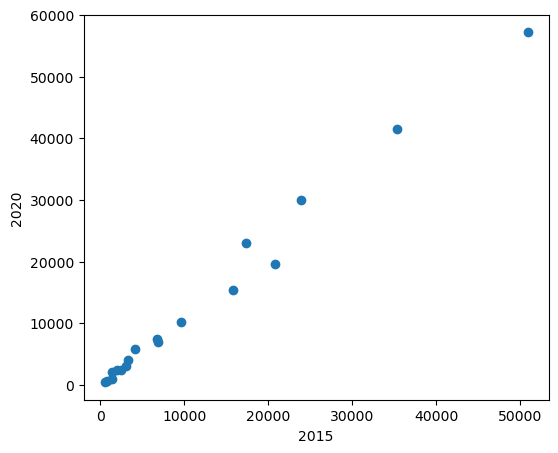

In [12]:
# 산점도 그리기
plt.rc('figure', figsize=(6, 5))
plt.scatter(sample_2015, sample_2020)

# 축 이름 지정
plt.xlabel('2015')
plt.ylabel('2020')

# 준비된 모든 그래프 한꺼번에 보여주기
plt.show()

**그래프 코드 2**

반면에 아래 코드는 다른 방식으로 동일한 산점도를 그린다.

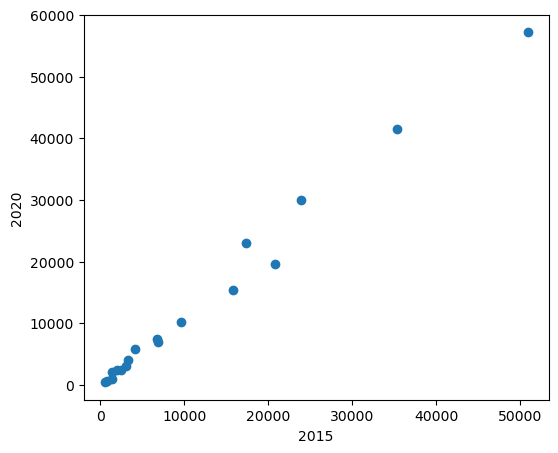

In [13]:
# Figure 객체 지정
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1)

# 산점도 그리기
ax.scatter(sample_2015, sample_2020)
ax.set_xlabel('2015')
ax.set_ylabel('2020')

# 준비된 모든 그래프 한꺼번에 보여주기
plt.show()

두 그래프 코드의 차이점은 `Figure` 객체와 서브플롯의 활용에 있다.

**`Figure` 객체**

`Figure` 객체는 아래 코드로 생성한다. 생성된 객체는 그림 액자의 기능을 수행한다.

```python
fig = plt.figure(figsize=(6,5))
```

위 코드에서 `figsize=(6,5)`는 생성되는 그래프의 크기를 지정한다.
이렇게 하면 앞서 아래 방식으로 지정된 그래프의 크기는 무시된다.

```python
plt.rc('figure', figsize=(6, 5))
```

<p><div align="center"><img src="https://github.com/codingalzi/statsRev/blob/master/jupyter-book/images/figures.png?raw=true" style="width:500px"></div></p>

<p style='text-align:center;'>그림 출처: <a href='https://velog.io/@regista/Matplotlib에서-Figure와-Axes-이해하기-Basic'>Matplotlib에서 Figure와 Axes 이해하기</a></p>

**서브플롯 추가**

서브플롯<font size='2'>subplot</font>은 그래프를 그릴 때 필요한 도화지에 해당한다.
아래 코드는 준비된 `Figure` 객체에 하나의 서브플롯을 추가한다.

```python
ax = fig.add_subplot(1, 1, 1)
```

위 코드는 다음과 같이 액자에 한 장의 도화지를 준비한 것과 동일하다.

<p><div align="center"><img src="https://github.com/codingalzi/statsRev/blob/master/jupyter-book/images/figures_subplots.png?raw=true" style="width:600px"></div></p>

<p style='text-align:center;'>그림 출처: <a href='https://velog.io/@regista/Matplotlib에서-Figure와-Axes-이해하기-Basic'>Matplotlib에서 Figure와 Axes 이해하기</a></p>

반면에 아래 코드는 두 개의 서브플롯을 추가한다.

```python
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
```

위 코드는 액자에 두 장의 도화지를 좌우로 배치시키는 효과를 낸다.

<p><div align="center"><img src="https://github.com/codingalzi/statsRev/blob/master/jupyter-book/images/figures_subplots121.png?raw=true" style="width:600px"></div></p>

<p style='text-align:center;'>그림 출처: <a href='https://velog.io/@regista/Matplotlib에서-Figure와-Axes-이해하기-Basic'>Matplotlib에서 Figure와 Axes 이해하기</a></p>

**`add_subplot()` 메서드의 인자**

`add_subplot()` 함수는 서브플롯을 행렬 모양으로 배치시킬 때 필요한 세 개의 정보를 인자로 받는다.

- 첫째와 둘째 인자: 도화지 배치를 지정하는 행렬의 크기
- 셋째 인자: 생성되는 서브플롯의 인덱스. 1부터 시작.

**`Axes` 객체**

`ax1`과 `ax2` 두 변수는 (1, 2) 모양으로 배치된 두 개의 서브플롯 위치 정보를 담은 `Axes` 객체를 가리킨다.

- `ax1`: (1, 2) 모양으로 배치된 두 개의 서브플롯 중에서 첫째, 즉 왼편에 위치한 서브플롯의 위치 정보
- `ax2`: (1, 2) 모양으로 배치된 두 개의 서브플롯 중에서 둘째, 즉 오른편에 위치한 서브플롯의 위치 정보

**그래프 삽입**

특정 서브플롯에 그래프를 그리려면 해당 서브플롯의 위치 정보를 가리키는
`ax1` 또는 `ax2`를 선택하여 `scatter()`와 같은 함수를 호출한다.
예를 들어 아래 코드는 10명 학생의 산점도와 함께 50명 전체의 산점도를 좌우로 나란히 배치시킨다.

`figsize`가 가리키는 값을 눈여겨 볼 필요가 있다.
이유는 `Figure` 객체 전체의 가로, 세로 크기와 비율을 어떻게 지정하느냐에 따라 그래프의 모양이 달라지기 때문이다.

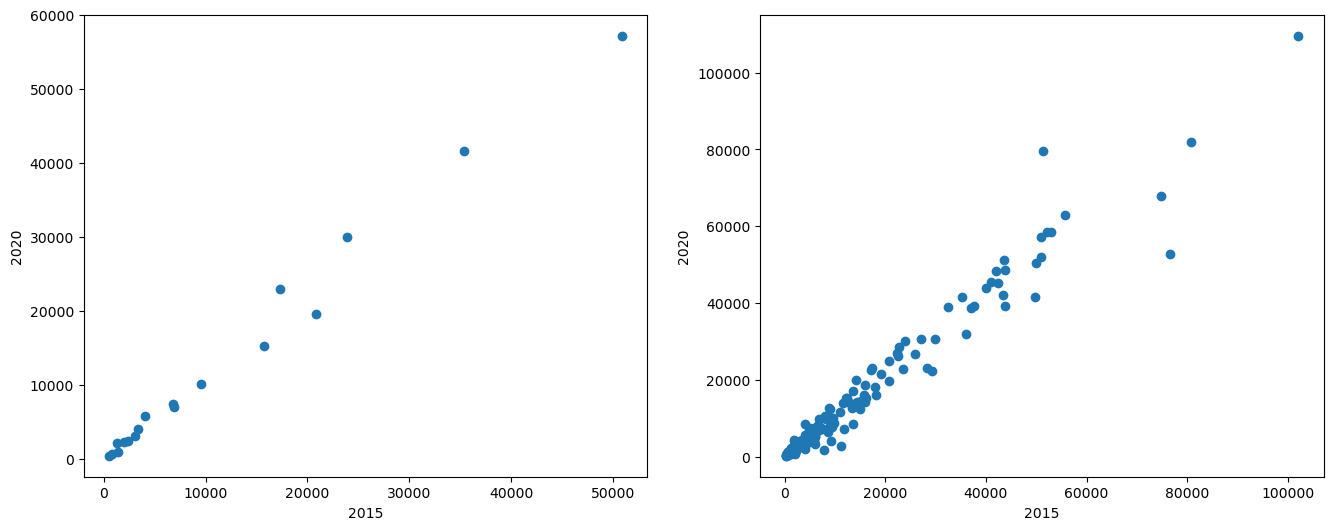

In [14]:
# Figure 객체 지정
fig = plt.figure(figsize=(16, 6))

# 왼쪽 도화지 지정
ax1 = fig.add_subplot(1, 2, 1)

# 오른쪽 도화지 지정
ax2 = fig.add_subplot(1, 2, 2)

# 왼쪽 도화지에 18개 국가 데이터의 산점도 그리기
ax1.scatter(sample_2015, sample_2020)
ax1.set_xlabel('2015')
ax1.set_ylabel('2020')

# 오른쪽 도화지에 전체 데이터 산점도 그리기
ax2.scatter(gdp_per_capita_2015, gdp_per_capita_2020)

# x-축, y-축 이름 지정
ax2.set_xlabel('2015')
ax2.set_ylabel('2020')

plt.show()

반면에 아래 코드는 두 개의 서브플롯을 위 아래로 배치시킨다.
`add_subplot()` 함수의 인자가 `(2, 1, 1)`와 `(2, 1, 2)`가 사용됨에 주의한다.
이렇게 좌우가 아닌 위아래로 배치시킬 경우 `figsize`의 둘째 값이 더 커져야 역시 가로세로 비율이 적당한
그래프가 그려진다.

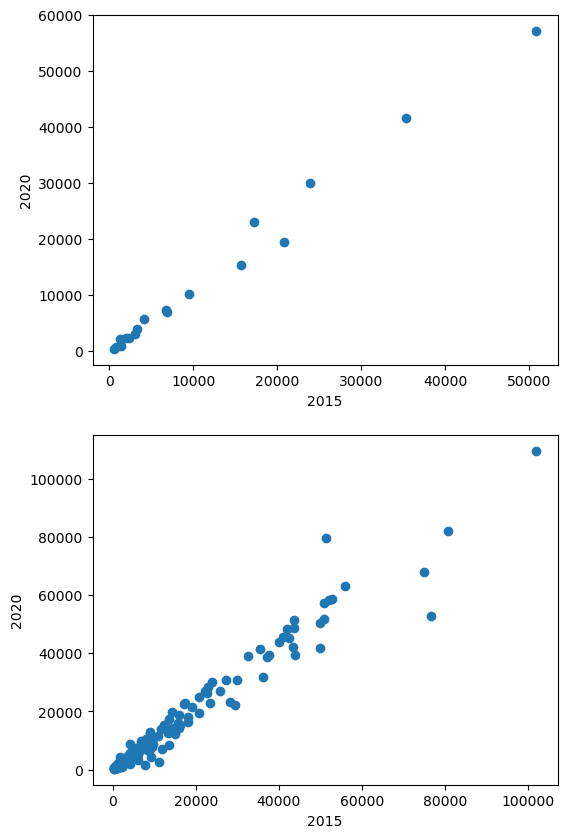

In [15]:
# Figure 객체 지정
fig = plt.figure(figsize=(6, 10))

# 위쪽 도화지 지정
ax1 = fig.add_subplot(2, 1, 1)
# 아래쪽 도화지 지정
ax2 = fig.add_subplot(2, 1, 2)

# 왼쪽 도화지에 18개 국가 데이터의 산점도 그리기
ax1.scatter(sample_2015, sample_2020)
ax1.set_xlabel('2015')
ax1.set_ylabel('2020')

# 오른쪽 도화지에 전체 데이터 산점도 그리기
ax2.scatter(gdp_per_capita_2015, gdp_per_capita_2020)

# x-축, y-축 이름 지정
ax2.set_xlabel('2015')
ax2.set_ylabel('2020')

plt.show()

## 선형 회귀

180 개 국가의 2015년 데이터와 2020년 데이터의 산점도를 보면 두 점수 사이의 상관계수가 높아 보인다.
실제로 0.98 정도로 선형 상관계수가 확인된다.

In [16]:
np.corrcoef(gdp_per_capita_2015, gdp_per_capita_2020)

array([[1.      , 0.978579],
       [0.978579, 1.      ]])

산점도를 보면 2015년 1인당 GDP가 높아질 수록 2020년 1인당 GDP도 일반적으로 상승하는 경향이 크다.
그 경향이 0.98 정도라는 의미인데 이를 보다 직관적으로 표현하기 위해
두 데이터의 상관관계를 시각적으로 보여주는 직선을 그려보자.

### 회귀 직선

산점도와 상관계수를 통해 두 데이터간의 상관관계가 확인될 때, 선형 회귀로 추정된 곡선을 산점도와 함께 그려보면 이들의 상관관계를 훨씬 더 직관적으로 이해할 수 있다.  

선형 회귀<font size='2'>Linear regression</font>란 두 데이터, 예를 들어, 영어 점수 데이터 X와 수학 점수 데이터 Y가 주어져 있을 때, 두 데이터간의 관계를 가장 잘 나타내는 관계식의 계수들을 추정하는 작업을 말한다.

예를 들어, $Y = aX + b$를 만족하는 기울기 $a$와 y-절편 $b$ 값을 추정하는 것은 직선으로 선형 회귀하는 것이다.

182 개 국가의 1인당 GDP를 가장 잘 대변하는 직선의 기울기와 절편을 구하기 위해
여기서는 `np.polyfit()` 함수를 이용한다.

In [17]:
poly_fit = np.polyfit(gdp_per_capita_2015, gdp_per_capita_2020, 1)

In [18]:
poly_fit

array([  1.028172, 223.134561])

`poly_fit` 변수가 가리키는 어레이는 두 점수의 상관관계를 **가장 잘 드러내는** 직선의 기울기와 절편을 포함다.
이 정보를 이용하여 산포도와 직선을 함께 그리면 찾아진 직선의 의미가 정확히 파악된다.

아래 `np.poly1d()` 함수는 기울기와 절편을 이용한 1차 함수를 선언한다.

In [19]:
poly_2015_2020 = np.poly1d(poly_fit)

아래 코드는 직선을 그리기 위해 필요한 x-축, y-축 좌표를 지정한다.

In [20]:
# x-축 좌표 생성
xs = np.linspace(gdp_per_capita_2015.min(), gdp_per_capita_2015.max())

# y-축 좌표 생성
ys = poly_2015_2020(xs)

아래 코드는 산점도와 회귀 직선을 하나의 그래프에 함께 그린다.

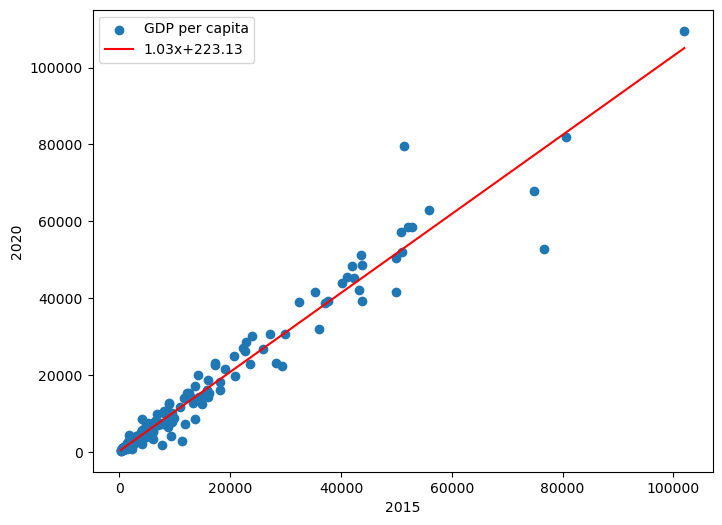

In [21]:
# Figure 객체 지정
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

# 산점도 그리기
ax.scatter(gdp_per_capita_2015, gdp_per_capita_2020, label='GDP per capita')

# 회귀 직선 그리기

# 직선 그리기
ax.plot(xs, ys, color='red', label=f'{poly_fit[0]:.2f}x+{poly_fit[1]:.2f}')

ax.set_xlabel('2015')
ax.set_ylabel('2020')

# 범례의 표시
ax.legend(loc='upper left')

plt.show()

### 회귀 예측

2015년도의 1인당 GDP가 25,000 달러 또는 65,000 달러인 국가는 데이터에 포함되지 않는다.

In [22]:
gdp_2015_1 = 25000
gdp_2015_1 in gdp_per_capita_2015

False

In [23]:
gdp_2015_2 = 65000
gdp_2015_2 in gdp_per_capita_2015

False

만약 한 나라의 1인당 GDP가 2015년도에 25,000달러 또는 65,000 달러였을 때 2020년도의 1인당 GDP는
얼마였을지 예측할 때 앞서 찾은 회귀 직선 `poly_2015_2020`을 이용할 수 있다.
왜냐하면 위 그래프에서 표시된 회귀 직선이 2015년도 1인당 GDP와 2020suseh 1인당 GDP의 상관관계를 잘 대변하고 있기에
그 성질을 이용하여 2015년도 1인당 GDP가 주어졌을 때 해당 국가의 2020년도 1인당 GDP를 예측하는 데에 활용할 수 있기 때문이다.

- 2015년도 1인당 GDP가 25,000달러일 때 2020년도 1인당 GDP 예측값

In [24]:
gdp_2020_1 = poly_2015_2020(gdp_2015_1)
gdp_2020_1

25927.426573

- 2015년도 1인당 GDP가 65,000달러일 때 2020년도 1인당 GDP 예측값

In [25]:
gdp_2020_2 = poly_2015_2020(gdp_2015_2)
gdp_2020_2

67054.293792

언급된 두 점을 `+` 기호로 표시하면 회귀 직선상에 위치한다.

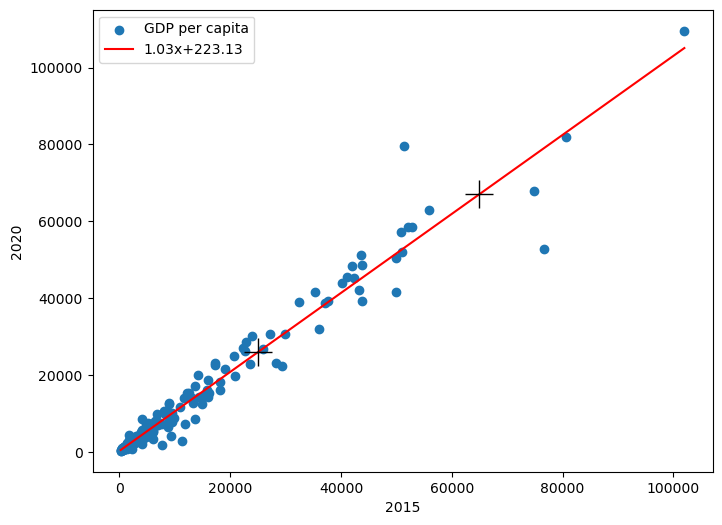

In [26]:
# Figure 객체 지정
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

# 산점도 그리기
ax.scatter(gdp_per_capita_2015, gdp_per_capita_2020, label='GDP per capita')

# 회귀 직선 그리기

# 직선 그리기
ax.plot(xs, ys, color='red', label=f'{poly_fit[0]:.2f}x+{poly_fit[1]:.2f}')

ax.set_xlabel('2015')
ax.set_ylabel('2020')

# 영어 59점과 90점일 때의 예측값
ax.plot([gdp_2015_1, gdp_2015_2], [gdp_2020_1, gdp_2020_2], '+k', ms=20)

# 범례의 표시
ax.legend(loc='upper left')

plt.show()

### 평균 제곱근 오차

앞서 찾은 직선 회귀가 50명의 영어 점수와 수학 점수 사이의 선형 상관관계를 **가장 잘 보여준다**고 하였다.
그런데 어떤 기준으로 "가장 잘 보여준다" 라고 했을까?

일반적으로 평균 제곱근 오차<font size='2'>root mean squared error</font>(RMSE)가 기준으로 사용되며 아래 식으로 정의된다.

$$
RMSE = \sqrt{\frac 1 n \, \sum_{i=1}^{n} (y_i - \hat{y_i})^2}
$$

단, 다음이 성립한다.

- $y_i$: 실제 값
- $\hat{y_i}$: 예측값

아래 그래프는 8개의 실제 데이터와 예측값 각각에 대한 오차의 제곱을 시각적으로 보여준다.
이 경우 RMSE는 파랑색 선분들의 길이의 제곱의 평균값이다.

<p><div align="center"><img src="https://github.com/codingalzi/statsRev/blob/master/jupyter-book/images/rmse.png?raw=true" style="width:600px"></div></p>

<p style='text-align:center;'>그림 출처: <a href='https://jmlb.github.io/flashcards/2018/07/01/mae_vs_rmse/'>Root Mean Squared Error Versus Mean Absolute Error</a></p>

`np.polyfit()` 함수는 **평균 제곱근 오차 값이 최소**가 되도록 하는 직선의 기울기와 절편을 찾아준다.
이에 대한 엄말한 수학 증명은 여기서는 다루지 않는다.
다만 2020년도 1인당 GDP로 예측된 값과 실제 값 사이의 평균 제곱근 오차만 계산해본다.

아래 코드는 182 개 국가의 2020년도 1인당 GDP에 대한 예측값을 계산한다.

In [27]:
gdp_2020_prediction = poly_2015_2020(gdp_per_capita_2020)

따라서 예측값과 실제 값 사이의 평균 제곱근 오차는 다음과 같이 계산된다.

In [28]:
diff = gdp_per_capita_2020 - gdp_2020_prediction
rmse = np.sqrt(np.mean(diff**2))
rmse

794.183871

즉, 2015년도 1인당 GDP를 이용하여 예측된 2020년도 1인당 GDP와 실제 2020년도 1인당 GDP 사이의 평균 제곱근 오차가 약 794달러 정도이다.
182 개 국각의 1인당 GDP의 평균값이 약 13,455달러이다.

In [29]:
gdp_per_capita_2020.mean()

13455.193698

이점을 고려할 때 794달러 정도의 편차는 상당히 작은 편이다.
즉, 선형 회귀 예측이 매우 정확하다고 말할 수 있다.

## 히트맵

아래 코드는 2015년도 1인당 GDP와 2020년도 1인당 GDP의 범위를 각각 5개 구간으로 쪼갠 후 각 영역에 포함된 국가의 수를
**히트맵**<font size='2'>heat map</font> 그래프로 그린다.
히트맵은 영역별 값의 크기를 색의 종류와 농도로 표현하는 그래프이며,
2차원 히스토그램으로 간주된다.

`plt.hist2d()` 함수는 다음 네 종류의 값으로 구성된 튜플을 반환한다.

- 첫째 항목: 영역별 빈도로 구성된 2차원 어레이
- 둘째 항목: x-축 구간
- 셋째 항목: y-축 구간
- 넷째 항목: 히트맵 그래프를 가리키는 객체

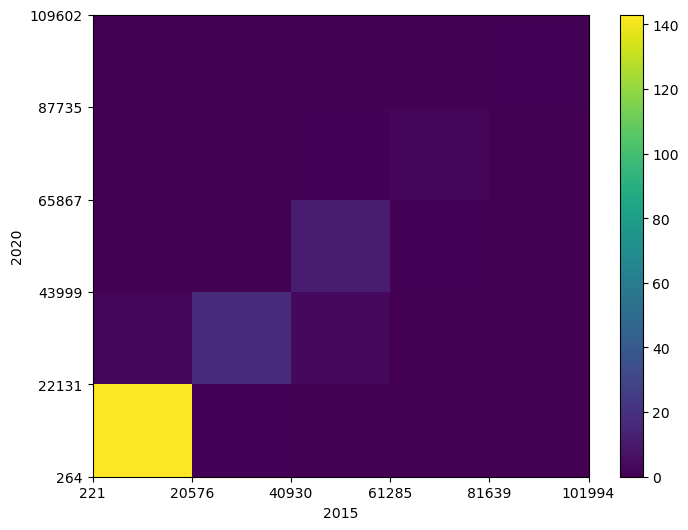

In [30]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

c = ax.hist2d(gdp_per_capita_2015,
              gdp_per_capita_2020,
              bins=[5, 5],
              cmap='viridis'
             )

ax.set_xlabel('2015')
ax.set_ylabel('2020')

ax.set_xticks(c[1]) # x-축 구간
ax.set_yticks(c[2]) # y-축 구간

# 색지도: 히트맵에 사용된 색의 종류와 농도를 색막대 형식으로 표시
fig.colorbar(c[3], ax=ax)

plt.show()

**색지도**

matplotlib 라이브러리에서 이미지를 출력할 때 색지도<font size='2'>color map</font>를 선택할 수 있다.
색지도는 `cmap` 키워드 인자로 지정하며, 기본값은 문자열 `'viridis'`다.
`cmap` 키워드 인자를 다르게 하면 느낌이 많이 달리지기도 한다.

아래 그림은 몇 개의 색지도를 보여준다.

<p><div align="center" border="1px"><img src="https://matplotlib.org/stable/_images/sphx_glr_colormaps_002_2_00x.png" style="width:80%;"></div></p>

보다 다양한 색지도 정보는 [Matplotlib: Choosing Colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html)를
참고한다.

- `cmap='Greys'`

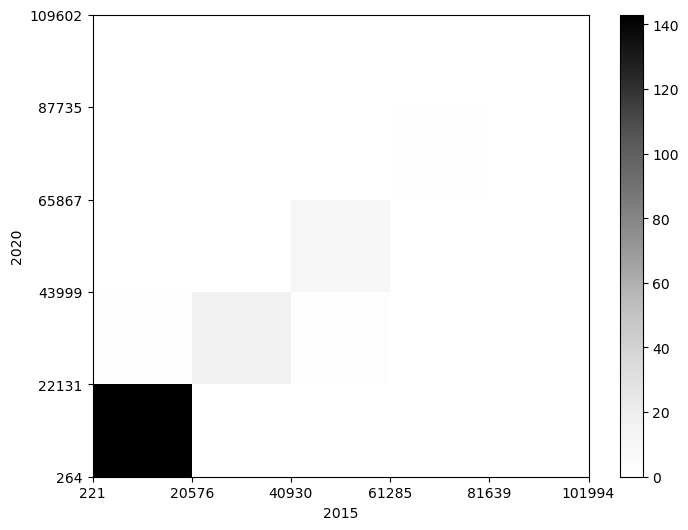

In [31]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

c = ax.hist2d(gdp_per_capita_2015,
              gdp_per_capita_2020,
              bins=[5, 5],
              cmap='Greys')

ax.set_xlabel('2015')
ax.set_ylabel('2020')

ax.set_xticks(c[1]) # x-축 구간
ax.set_yticks(c[2]) # y-축 구간

# 컬러바: 히트맵 정보 활용
fig.colorbar(c[3], ax=ax)

plt.show()

- `cmap='Blues'`

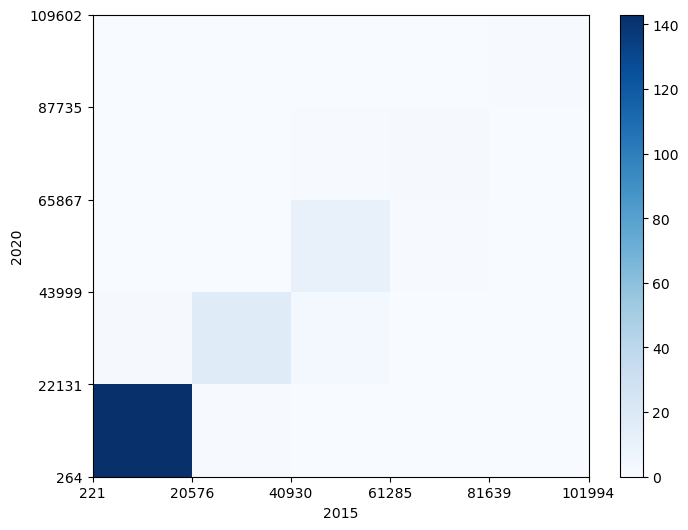

In [32]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

c = ax.hist2d(gdp_per_capita_2015,
              gdp_per_capita_2020,
              bins=[5, 5],
              cmap='Blues')

ax.set_xlabel('2015')
ax.set_ylabel('2020')

ax.set_xticks(c[1]) # x-축 구간
ax.set_yticks(c[2]) # y-축 구간

# 컬러바: 히트맵 정보 활용
fig.colorbar(c[3], ax=ax)

plt.show()

**seaborn 라이브러리**

seaborn 라이브러리는 matplotlib 라이브러리를 확장하며, 보다 다양한 기능과 섬세한 설정을 지원한다.
seaborn 라이브러리는 관습적으로 sns 별칭으로 불러온다.

In [33]:
import seaborn as sns

아래 코드는 동일한 히트맵을 다른 느낌으로 전달한다.
seaborn 라이브러리의 그래프 함수는 모두 `ax` 키워드 인자를 사용해서
그래프를 그릴 서브플롯을 지정한다.

`sns.histplot()` 함수의 첫째 인자로 2015년도와 2020년도 데이터 모두를 담고 있는 데이터프레임이 사용되었음에 주의한다.
x-축과 y-축에 사용되는 데이터는 각각 `x`와 `y` 매개변수의 인자로 지정된다.
`cbar=True` 키워드 인자는 히트맵 오른쪽에 위치한 색지도를 포함시킨다.

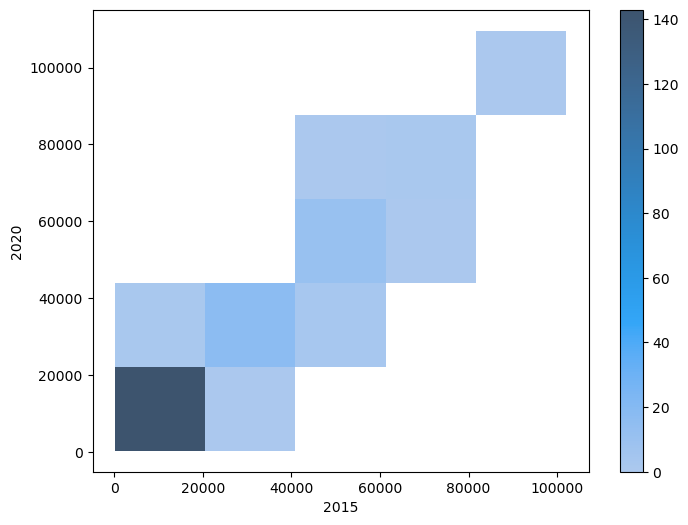

In [34]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

sns.histplot(gdpPerCapita_2015_2020, x='2015', y='2020', bins=(5, 5), cbar=True, ax=ax)

plt.show()

색지도를 지정할 수도 있다.

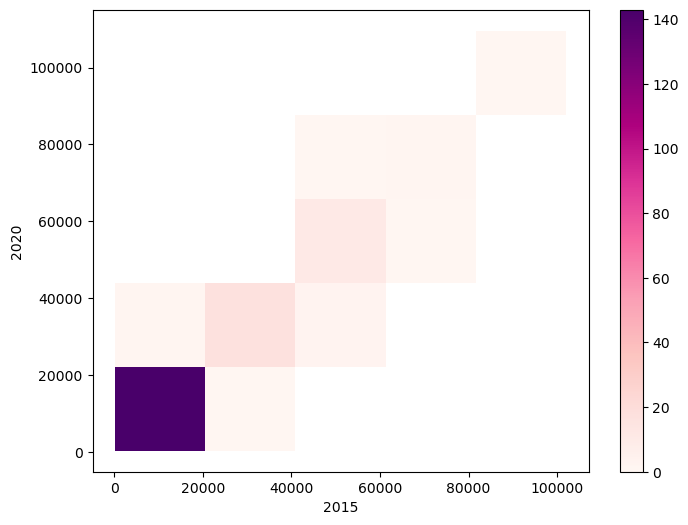

In [35]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

sns.histplot(gdpPerCapita_2015_2020, x='2015', y='2020', bins=(5, 5), cbar=True, ax=ax, cmap='RdPu')

plt.show()

## 앤스컴 데이터 4중주

지금까지 분산, 상관계수 등 수치 지표를 이용하여 데이터의 분포를 파악하였다.
그런데 수치 지표가 동일하더라도 시각화를 진행하면 완전히 다른 데이터가 될 수도 있는데,
앤스컴 데이터 4중주(Anscombe's quartet)가 대표적이다.

:::{admonition} 프랜시스 앤스컴
:class: note

프랜시스 앤스컴<font size='2'>Francis J. Anscombe</font>는 영국 출식 통계학자이며,
1973년에 앤스컴 데이터 4중주라고 불리는 4개의 데이터셋을 소개하였다.
:::

**데이터 불러오기**

앤스컴 데이터 4중주에 사용된 데이터셋은 인터넷의 여러 사이트에서 다양한 형식으로 제공된다.
여기서는 데이터프레임 형식으로 제공되는 csv 파일을 이용한다.

In [36]:
anscombe_df = pd.read_csv(data_url+'anscombe.csv')
anscombe_df

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47
5,14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,6,8,7.24,6.13,6.08,5.25
7,4,4,4,19,4.26,3.10,5.39,12.50
8,12,12,12,8,10.84,9.13,8.15,5.56
9,7,7,7,8,4.82,7.26,6.42,7.91


**동일한 평균값, 표준편차, 분산, 4분위수**

`x1`부터 `x4`까지, 그리고 `y1`부터 `y4`까지의 데이터에 대한
평균값, 편차, 분산, 4분위수가 모두 동일함이
`describe()` 메서드로 확인된다.

In [37]:
anscombe_df.describe()

,x1,x2,x3,x4,y1,y2,y3,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,9.000000,9.000000,9.000000,7.500909,7.500909,7.500000,7.500909
std,3.316625,3.316625,3.316625,3.316625,2.031568,2.031657,2.030424,2.030579
min,4.000000,4.000000,4.000000,8.000000,4.260000,3.100000,5.390000,5.250000
25%,6.500000,6.500000,6.500000,8.000000,6.315000,6.695000,6.250000,6.170000
50%,9.000000,9.000000,9.000000,8.000000,7.580000,8.140000,7.110000,7.040000
75%,11.500000,11.500000,11.500000,8.000000,8.570000,8.950000,7.980000,8.190000
max,14.000000,14.000000,14.000000,19.000000,10.840000,9.260000,12.740000,12.500000


**`(xi, yi)` 를 담은 네 개의 어레이**

각각의 `i`에 대해 `(xi, yi)`로 구성된 네 개의 데이터셋을 선언한다.
다양한 방식이 가능하지만 여기서는 가장 단순하게 네 개의 변수 각각이
가리키는 데이터프레임으로 선언한다.

In [38]:
data1 = anscombe_df.iloc[:, [0, 4]]
data2 = anscombe_df.iloc[:, [1, 5]]
data3 = anscombe_df.iloc[:, [2, 6]]
data4 = anscombe_df.iloc[:, [3, 7]]

네 개의 데이터프레임을 묶어 하나의 리스트로 선언한다.

In [39]:
anscombe_arr = np.array([data1, data2, data3, data4])

참고로 (4, 11, 2) 모양의 3차원 어레이가 생성된다.

In [40]:
anscombe_arr.shape

(4, 11, 2)

(4, 11, 2) 모양의 3차원 어레이는
4 개의 (11, 2) 모양의 어레이로 구성된 어레이로 이해하면 된다.
3차원 어레이에 대한 보다 자세한 설명은 여기서는 하지 않는다.

**산점도와 선형 회귀**

네 개의 데이터셋 각각을 대상으로 산점도와 회귀 직선을 그리기 위해
(2, 2) 모양의 서브플롯 네 개를 이용한다.

아래 코드에 사용된 `plt.subplots()` 함수는 `Figure` 객체와 서브플롯 구성방식을 동시에 지정한다.

- `fig` 변수: 액자 역할 담당의 `Figure` 객체
- `axes` 변수: (2,2) 모양으로 구성된 서브프플롯들의 `Axes` 정보를 담은 (2, 2) 모양의 어레이

함수 호출에 필요한 키워드 인자의 기능은 다음과 같다.

- `nrows=2`와 `ncols=2`: (2, 2) 모양으로 서브플롯 구성
- `sharex`와 `sharey` 키워드 인자: 도화지들이 x-축, y-축 눈금의 공유 여부 지정. 여기서는 공유하기로 지정.

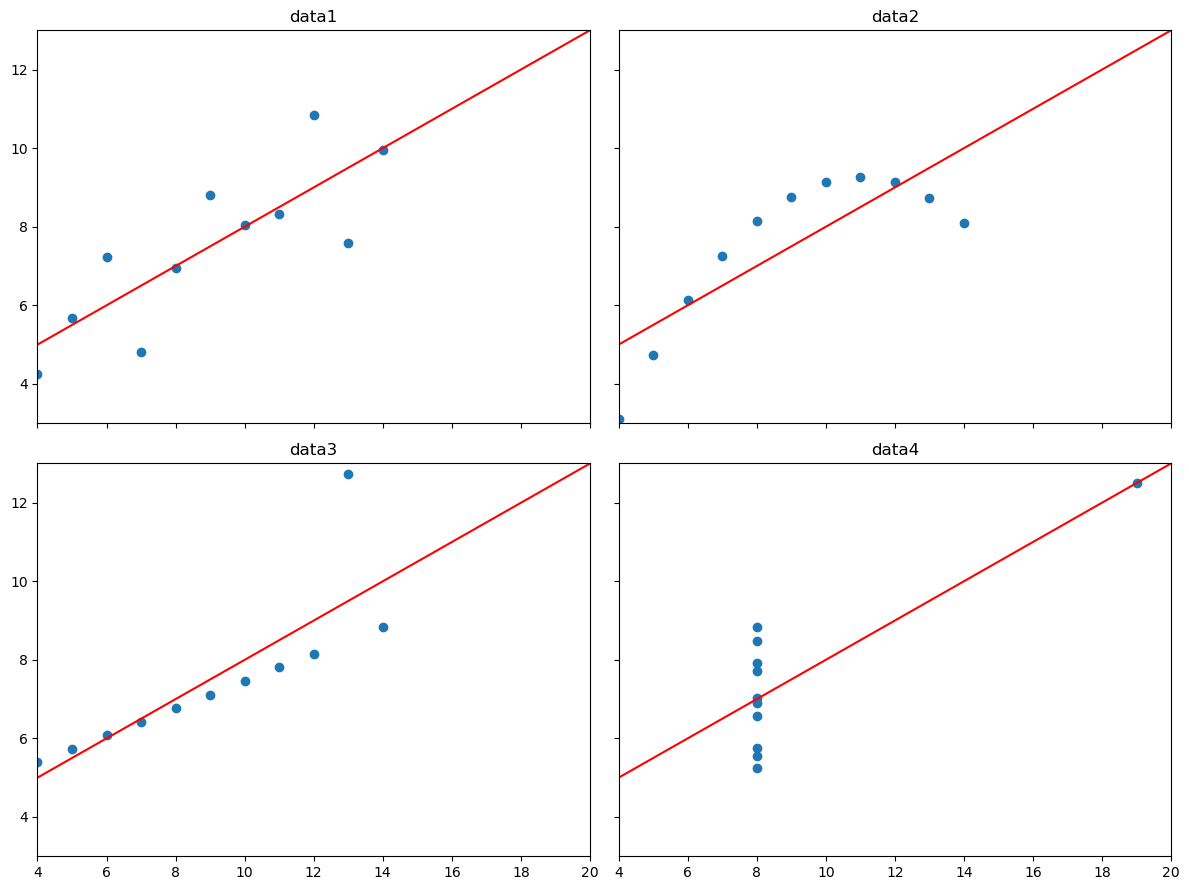

In [41]:
# Figure 객체와 Axes 지정
fig, axes = plt.subplots(nrows=2,
                         ncols=2,
                         figsize=(12, 9),
                         sharex=True,
                         sharey=True)

xs = np.linspace(0, 30, 100)

# 앤스컴 데이터 4중주 그래프 그리기
for i, data in enumerate(anscombe_arr):
    # 회귀 직선 데이터
    poly_fit = np.polyfit(data[:,0], data[:,1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)

    # 서브플롯 지정
    ax = axes[i//2, i%2] # i = 0, 1, 2, 3에 해당하는 서브폴롯

    # 산점도와 회귀 직선
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='red')

    # x-축, y-축 범위 지정
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])

    # 타이틀
    ax.set_title(f'data{i+1}')

# 그래프 사이의 간격을 좁힘
plt.tight_layout()
plt.show()

**데이터 시각화의 중요성**

평균, 분산, 상관계수 등 모든 수치 지표가 동일하지만
앤스컴 데이터 4중주에 포함된 네 개의 데이터는 완전히 다른 분포를 띠고 있다.
따라서 수치 지표 뿐만 아니라 시각화된 그래프도 함께 확인하는 일이 매우 중요함을
기억해야 한다.

## 연습문제

참고: [(연습) 2차원 데이터 시각화](https://colab.research.google.com/github/codingalzi/statsRev/blob/master/practices/practice-twoD_visualization.ipynb)